What Is Image Enhancement?

Image enhancement is the process of adjusting digital images so that the results are more suitable for display or further image analysis. For example, you can remove noise, sharpen, or brighten an image, making it easier to identify key features.

Some common goals of image enhancement include increasing contrast, sharpness, and colorfulness; reducing noise and blur; and correcting distortion and other defects. Image enhancement techniques can be applied manually using image editing software, or automatically using algorithms and computer programs such as OpenCV. 

Adjusting brightness and contrast

Adjusting the brightness and contrast of an image can significantly affect its visual appeal and effectiveness. It can also help to correct defects or flaws in the image and make it easier to see details. Finding the right balance of brightness and contrast is important for creating an attractive and effective image.

In [5]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
image = cv.imread('lowlight.jpg')

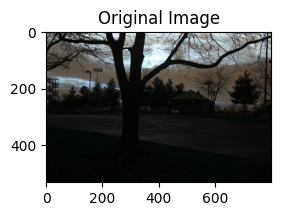

In [6]:
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

In [7]:
brightness = 50
contrast = 10
image_bright = np.clip(image * (contrast / 127 + 1) - contrast + brightness, 0, 255).astype(np.uint8)

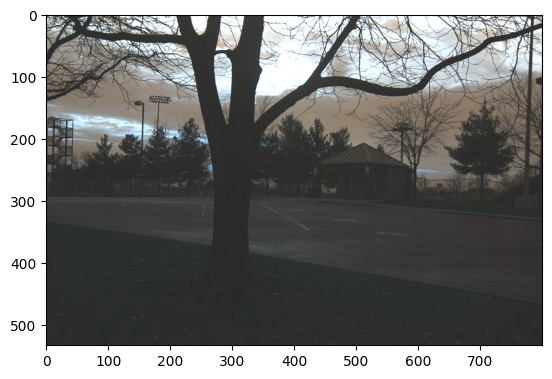

In [8]:
plt.imshow(image_bright)

Gray Level TransformationGray Level Transformation

Image enhancement is the most fundamental and simple process of digital image processing. In this process, the intensity level of an image is manipulated to get a better output image. For this purpose, we will use the mathematical operation of gray level transformation, also known as intensity transformation. In this article, we are going to understand gray-level transformations in detail along with their applications.

g(x. y) = T[f(x, y)]

where, f (x, y) is the input image, g(x, y) is the output image and T is an operator on f defined over the neighborhood of point (x, y). The neighborhood of an arbitrary point (x, y) is shown in the figure below:

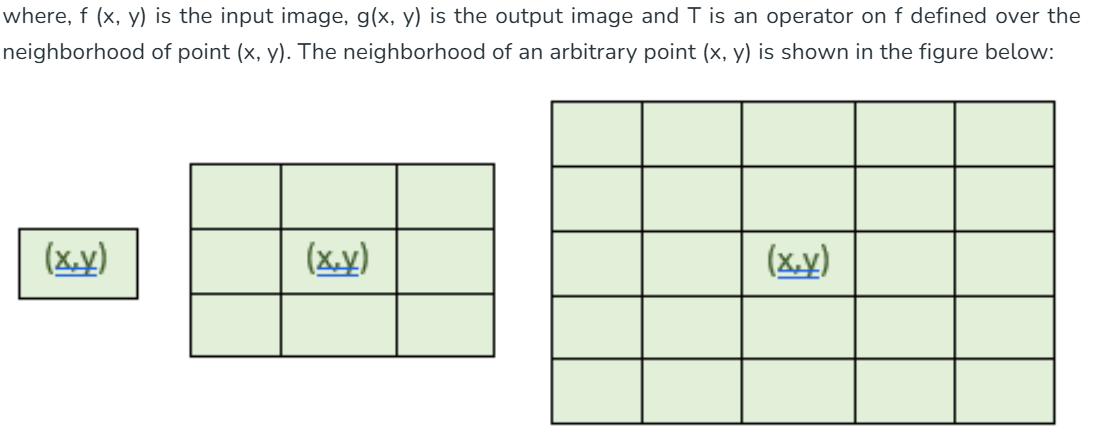

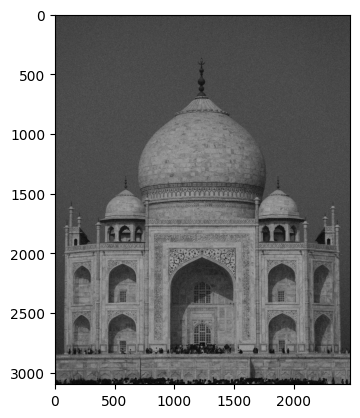

In [9]:
grey_image = cv.imread('taj_grey.jpg')
plt.imshow(grey_image)

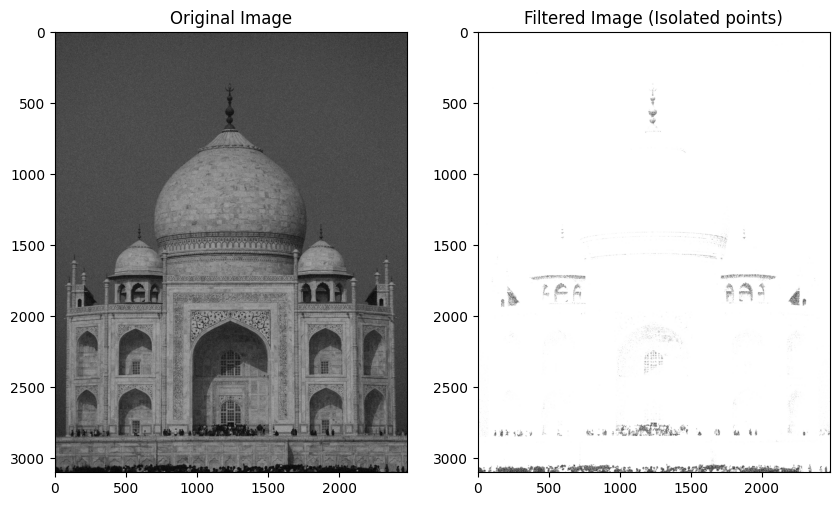

In [19]:
kernel = np.array([[0, 1, 0], [1, 3, 1], [0, 1, 0]])
filtered_image = cv.filter2D(grey_image, -1, kernel)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(grey_image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Isolated points)')
plt.show()

Image Negative Transformation

Image negation reverses pixel values:

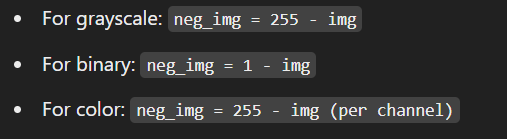

In [21]:
gray_neg = 255 - grey_image
color_neg = 255 - image_bright

In [25]:
_, binary_image = cv.threshold(grey_image, 128, 255, cv.THRESH_BINARY)
binary_neg = 255 - binary_image

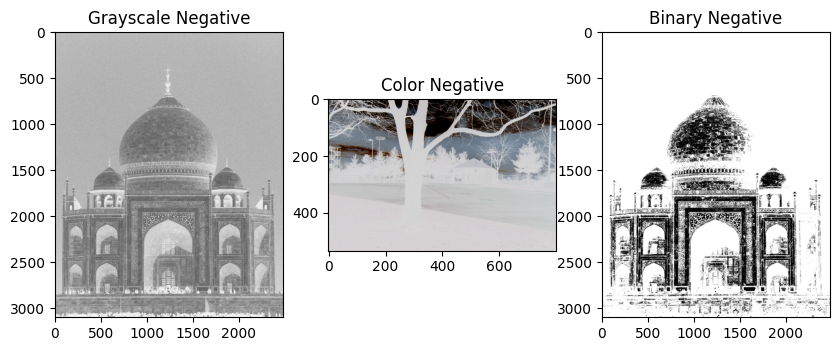

In [26]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1), plt.imshow(gray_neg, cmap='gray'), plt.title('Grayscale Negative')
plt.subplot(1, 3, 2), plt.imshow(color_neg), plt.title('Color Negative')
plt.subplot(1, 3, 3), plt.imshow(binary_neg, cmap='gray'), plt.title('Binary Negative')
plt.show()

Spatial Domain Contrast Stretching

1. What is Contrast Stretching (Spatial Domain Technique)?

Contrast stretching improves image visibility by remapping pixel intensity values. It enhances contrast by scaling pixel values to a wider range, typically from 0 to 255.

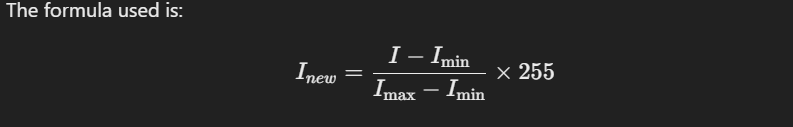

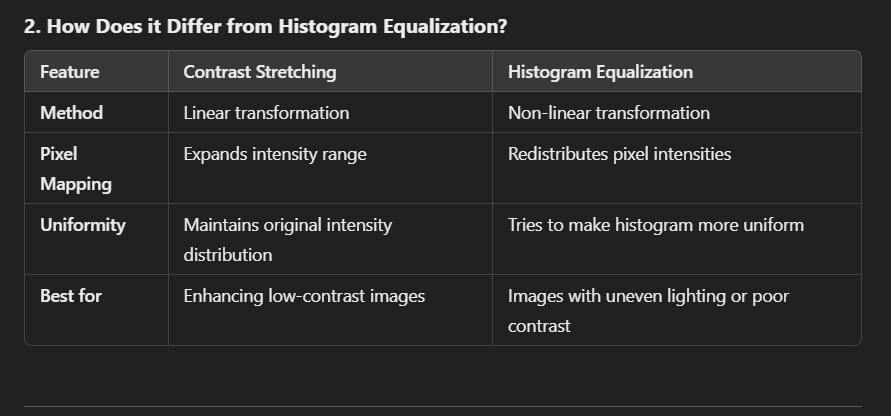

def con

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


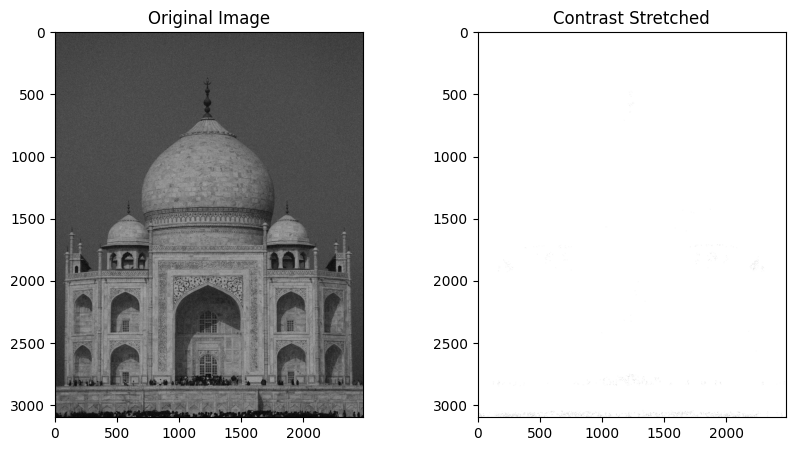

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.00000000000003].


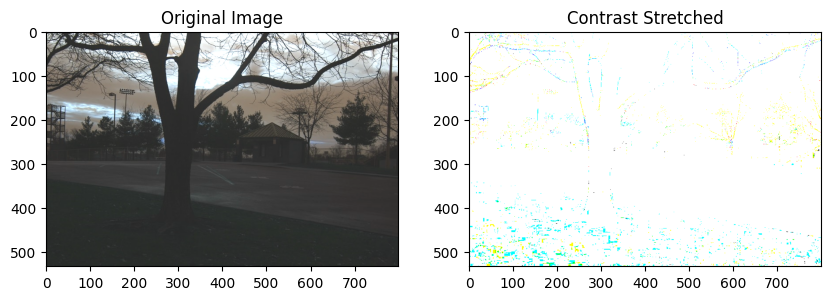

In [28]:
def contrast_stretching(img):
    min_val = np.min(img)
    max_val = np.max(img)
    stretched_image = (img - min_val) * (255 / (max_val - min_val))
    return stretched_image
stretch_image = contrast_stretching(grey_image)
stretch_image_color = contrast_stretching(image_bright)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(grey_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(stretch_image, cmap='gray'), plt.title('Contrast Stretched')
plt.show()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image_bright, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(stretch_image_color, cmap='gray'), plt.title('Contrast Stretched')
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


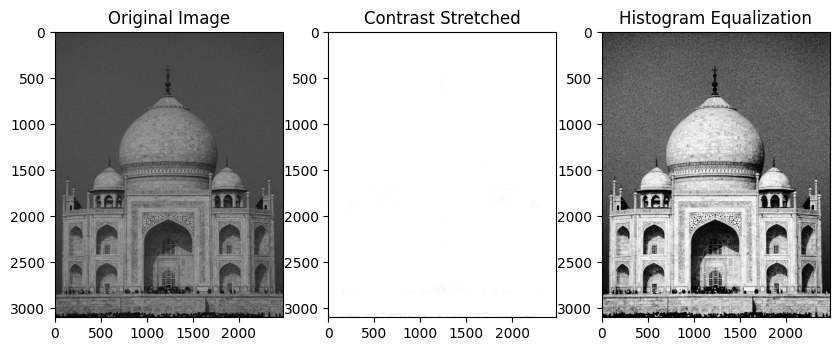

In [32]:
# Convert the image to grayscale if it is not already
if len(grey_image.shape) == 3:
	grey_image_gray = cv.cvtColor(grey_image, cv.COLOR_BGR2GRAY)
else:
	grey_image_gray = grey_image

hist_eq = cv.equalizeHist(grey_image_gray)

plt.figure(figsize=(10,5))
plt.subplot(1,3,1), plt.imshow(grey_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(stretch_image, cmap='gray'), plt.title('Contrast Stretched')
plt.subplot(1,3,3), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Equalization')
plt.show()

Contrast Stretching maintains the structure but improves visibility by expanding intensity.

Histogram Equalization redistributes pixel intensities to achieve a more uniform contrast.

Gray Level Slicing: Highlighting a Specific Intensity Range in an Image

1. What is Gray Level Slicing?


Gray level slicing is a technique used to enhance a specific range of pixel intensities in an image while suppressing others. It is commonly used in medical imaging, satellite imagery, and defect detection.

In [ ]:
mri_image = cv.imread('image.png', cv.IMREAD_GRAYSCALE)


In [35]:
low , high = 80 , 150
def grey_level_slicing(img, low, high):
    img = img.copy()
    img[img < low] = 0
    img[img > high] = 0
    return img

In [37]:
sliced_image = grey_level_slicing(mri_image, low, high)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(mri_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(sliced_image, cmap='gray'), plt.title('Contrast Stretched')
plt.show()


Bit Plane Slicing for Fingerprint Image Analysis

1. What is Bit Plane Slicing?

Bit plane slicing is a technique used to analyze the contribution of individual bits in an image. Since grayscale images typically have 8 bits per pixel (ranging from 0 to 255), each bit-plane represents a different level of detail in the image.

Higher-order bits (MSB - Most Significant Bits) → Contain major structural details.

Lower-order bits (LSB - Least Significant Bits) → Contain finer textures/noise.


Bit Plane Extraction: Each pixel value is converted into its 8-bit binary representation

Bitwise AND Operation: Used to isolate each bit plane.

In [49]:
image_finger = cv.imread('fingerprint.jpg', cv.IMREAD_GRAYSCALE)
def bit_plane_slicing(img, bit):
    bit_plane = (img >> bit) & 1
    bit_plane = bit_plane * 255 
    return bit_plane

(<Axes: title={'center': 'Bit Plane 7'}>,
 Text(0.5, 1.0, 'Bit Plane 7'))

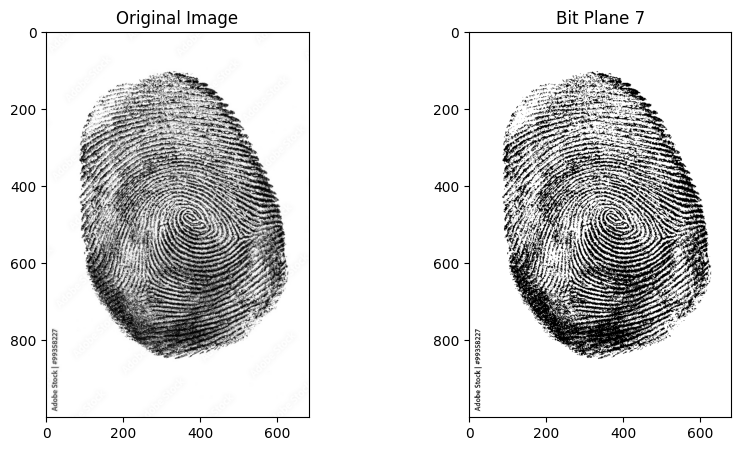

In [50]:
bit_planes = bit_plane_slicing(image_finger, 7)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1), plt.imshow(image_finger, cmap='gray'), plt.title('Original Image')
plt.subplot(1,2,2), plt.imshow(bit_planes, cmap='gray'), plt.title('Bit Plane 7')


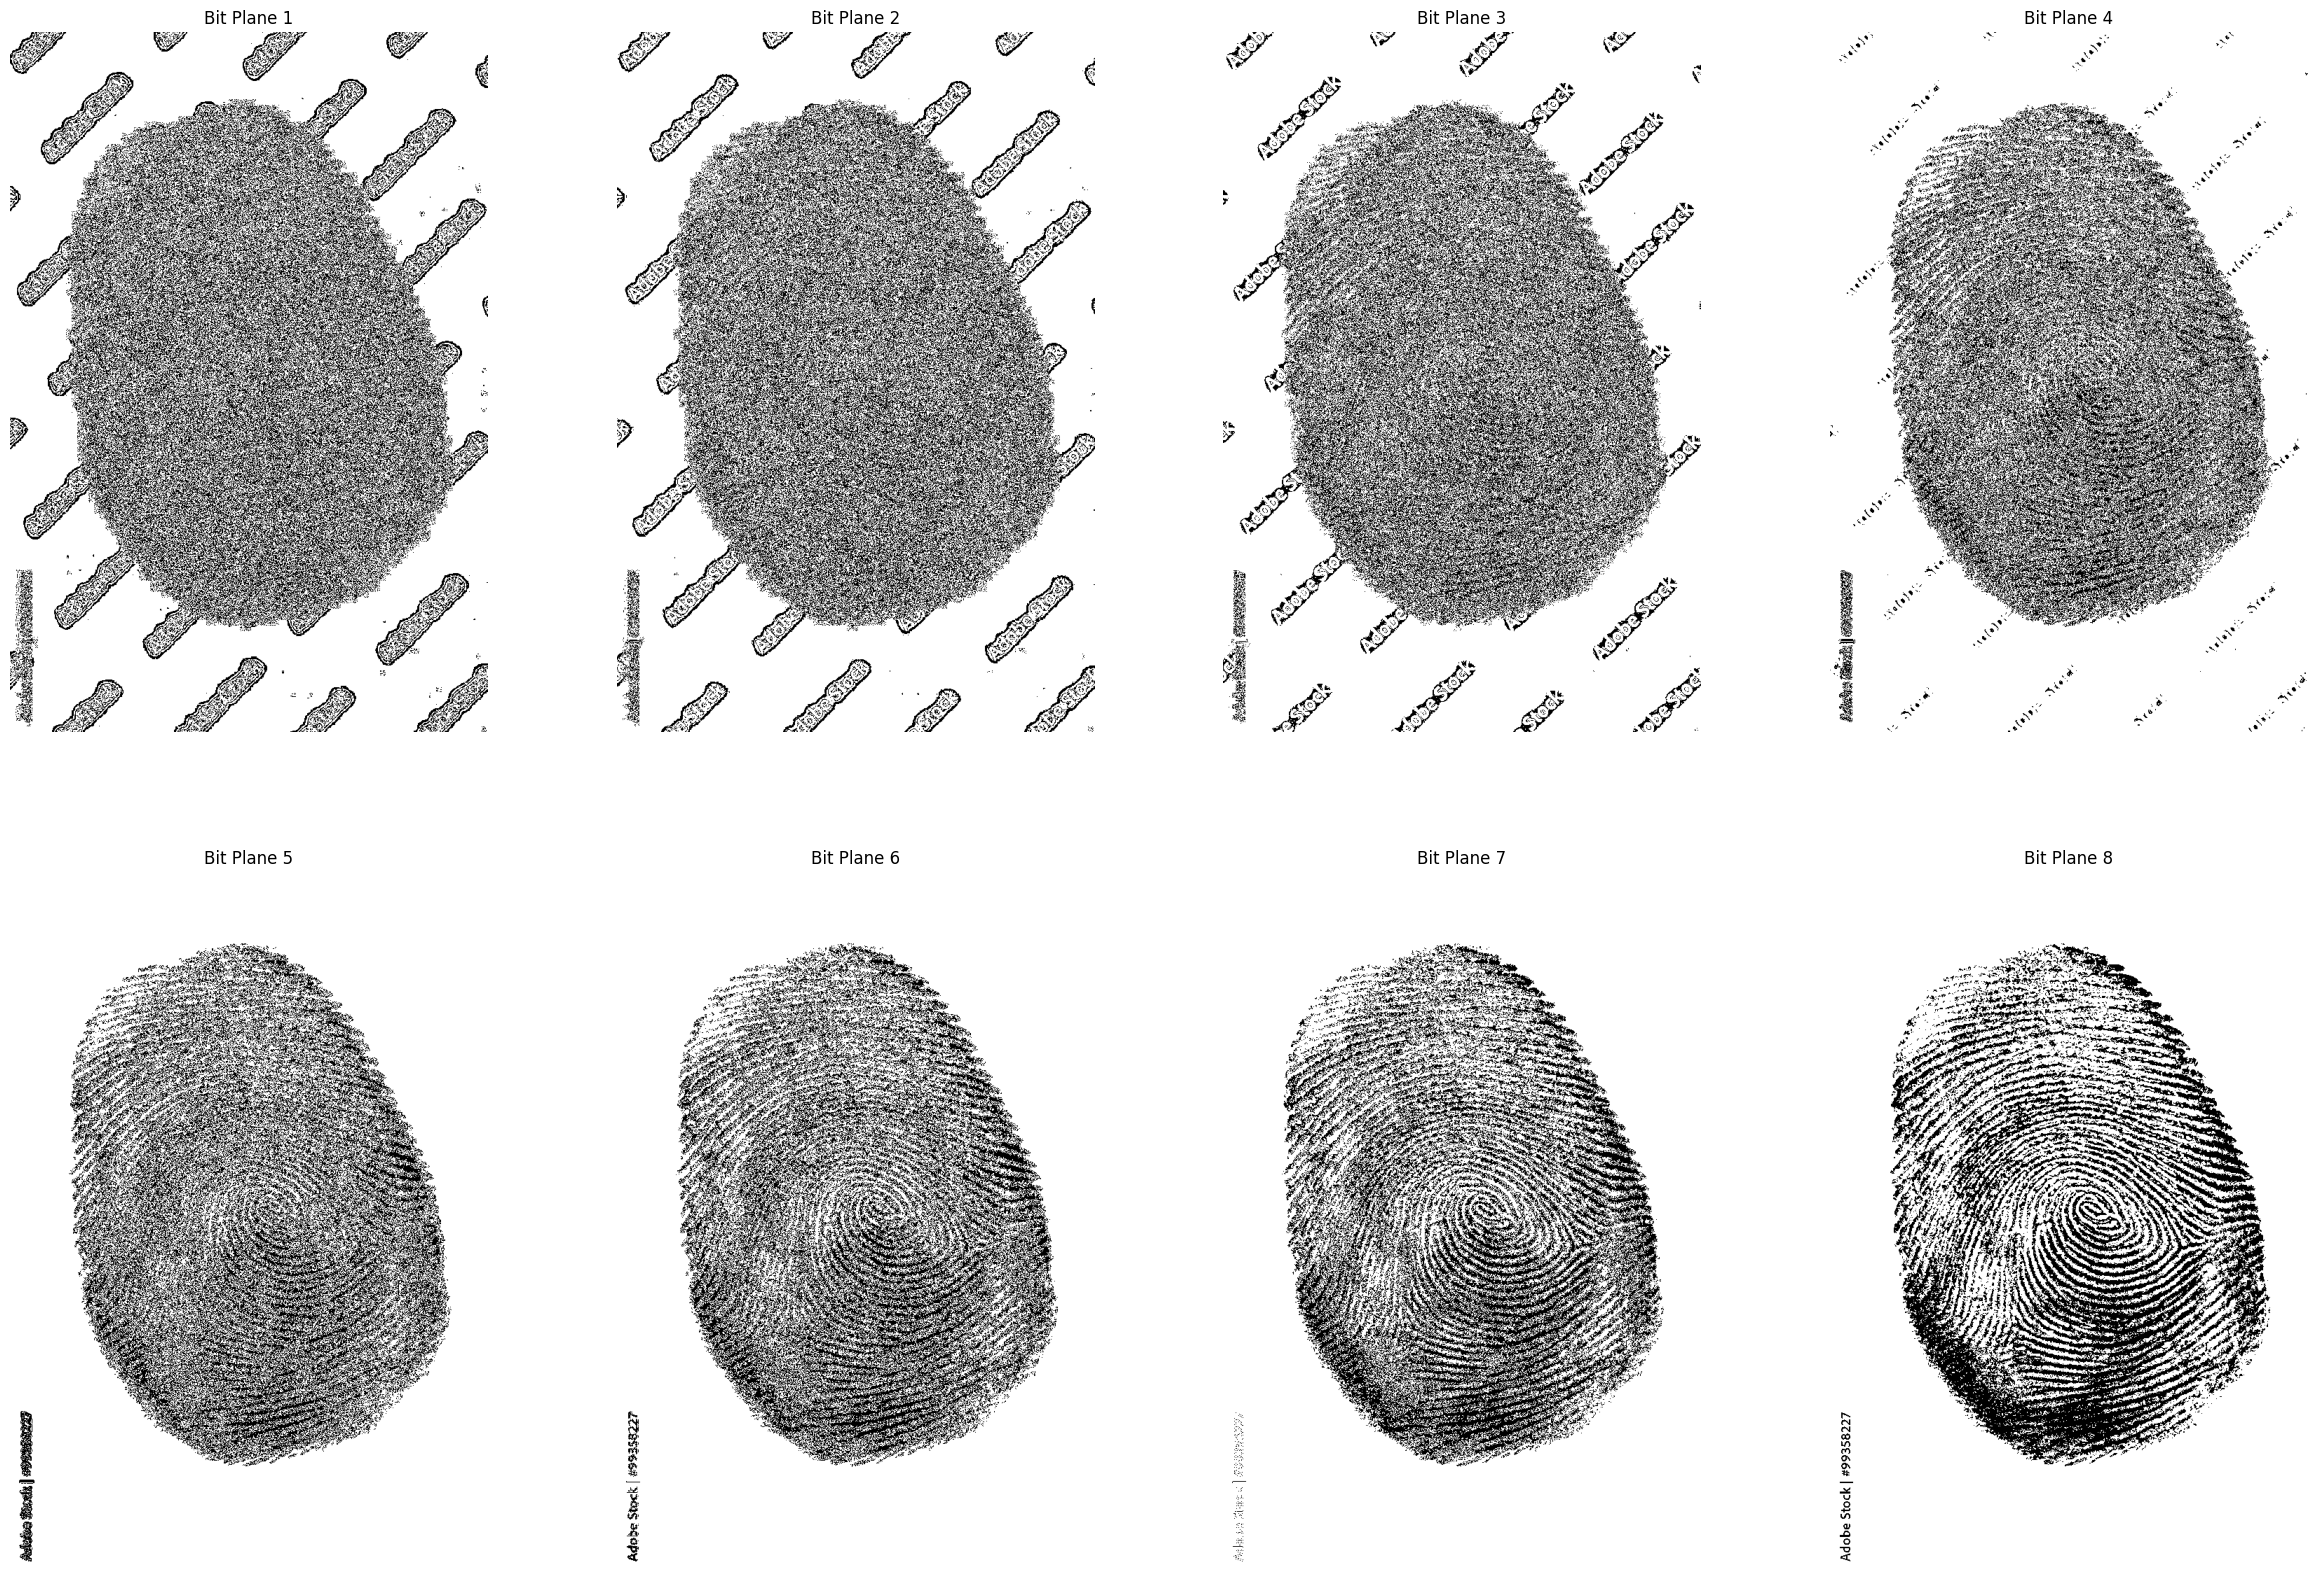

In [52]:
plt.figure(figsize=(30, 20))
for i in range(8):
    bit = bit_plane_slicing(image_finger, i)
    plt.subplot(2, 4, i+1)
    plt.imshow(bit, cmap='gray')
    plt.title('Bit Plane ' + str(i+1))
    plt.axis('off')

Histogram Equalization & Adaptive Histogram Equalization for X-ray Image Enhancement

Why Use Histogram Equalization for X-ray Images?

X-ray images often suffer from low contrast due to varying exposure conditions. Histogram Equalization (HE) enhances contrast by redistributing pixel intensity values, making important details more visible.

(<Axes: title={'center': 'CLAHE'}>,
 Text(0.5, 1.0, 'CLAHE'))

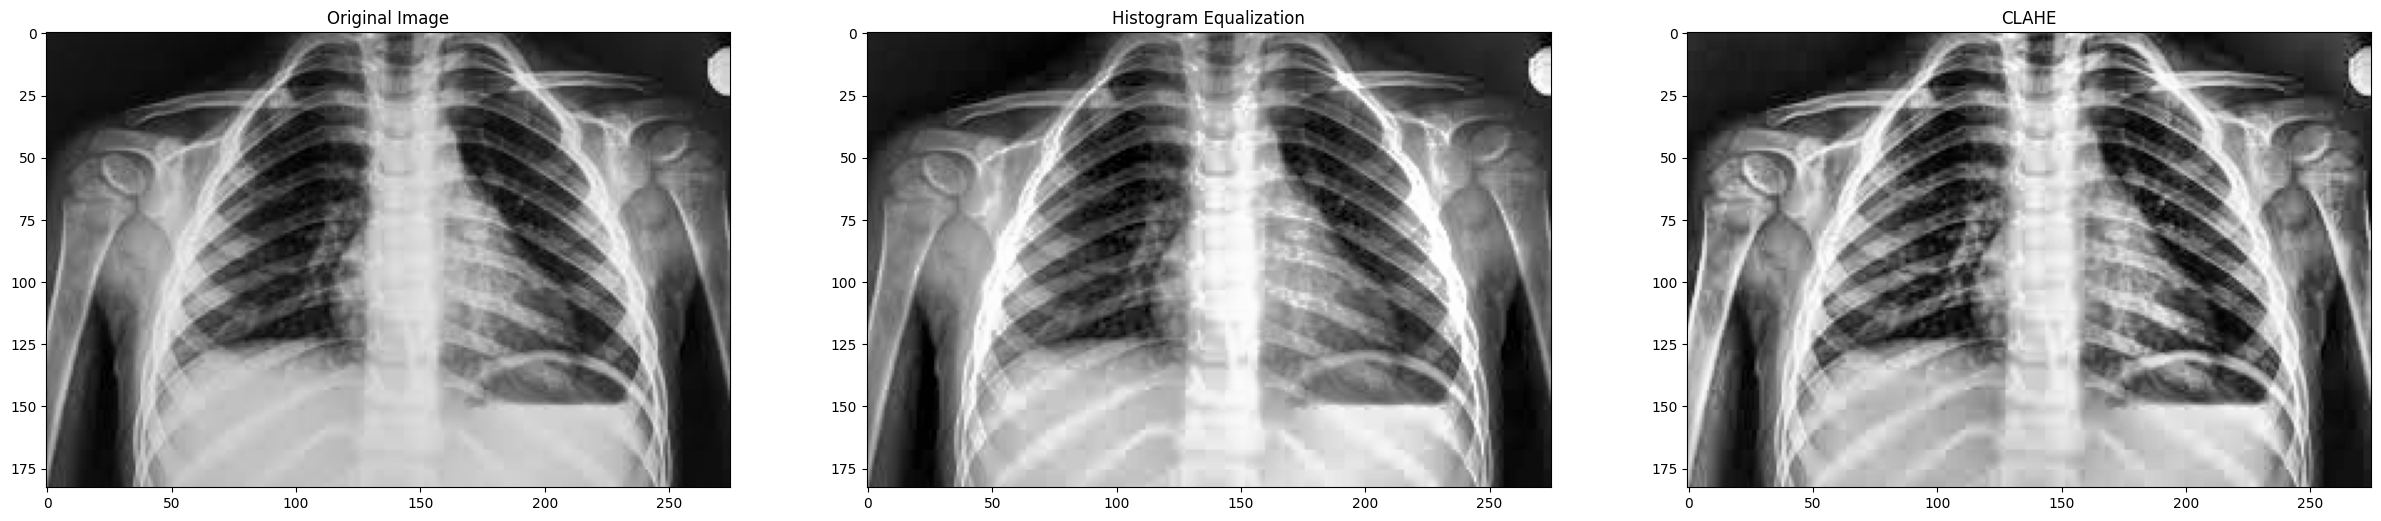

In [57]:
x_ray_image = cv.imread('xray.jpeg', cv.IMREAD_GRAYSCALE)
hist_eq = cv.equalizeHist(x_ray_image)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(x_ray_image)
plt.figure(figsize=(30,30))
plt.subplot(1,3,1), plt.imshow(x_ray_image, cmap='gray'), plt.title('Original Image')
plt.subplot(1,3,2), plt.imshow(hist_eq, cmap='gray'), plt.title('Histogram Equalization')
plt.subplot(1,3,3), plt.imshow(clahe_image, cmap='gray'), plt.title('CLAHE')